# Women Risk Predictor - Feature Engineering

This notebook covers the feature engineering pipeline for the women harassment risk prediction project.

## Overview
This notebook includes:
1. **Load Cleaned Data** - Import the cleaned dataset
2. **Correlation Analysis** - Analyze feature correlations with target variable
3. **Create New Features** - Engineer new features from existing ones
4. **Scale Numeric Features** - Standardize numerical features
5. **Split Features and Target** - Separate features from target variable
6. **Save Processed Data** - Export the engineered dataset for model training

---

## 1. Import Required Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load Cleaned Data

Load the cleaned dataset from the previous data preparation step.

In [3]:
# Load cleaned data
data_path = "../data/women_risk_cleaned.csv"

print("=" * 60)
print("LOADING CLEANED DATASET")
print("=" * 60)

data = pd.read_csv(data_path)

print(f"\nDataset loaded successfully!")
print(f"Shape: {data.shape}")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

# Display first few rows
print("\nFirst 5 rows:")
data.head()

LOADING CLEANED DATASET

Dataset loaded successfully!
Shape: (115, 13)
Number of Rows: 115
Number of Columns: 13

First 5 rows:


,Timestamp,1. What is your age group?,2. What is your occupation?,3. At what time of day did the incident occur?,4. Where did the incident occur?,5. How crowded was the location at the time of the incident?,6. What was the lighting condition in the area?,7. Was any form of security present at the location?,8. Were you familiar with the area where the incident occurred?,9. What type of harassment did you experience?,10. How often have you experienced harassment in similar situations?,11. How safe did you feel during the incident?,"12. Overall, how would you rate the risk level of harassment in that situation?"
0,0,0,3,2,3,4,2,2,3,2,3,2,4
1,1,0,3,2,2,0,3,2,4,2,0,5,3
2,2,0,3,4,1,3,4,2,1,1,3,4,3
3,3,0,3,4,2,0,3,2,3,2,2,4,0
4,4,1,2,1,3,2,2,3,2,4,3,4,0


## 3. Correlation Analysis

Analyze the correlation between features and the target variable.

CORRELATION ANALYSIS


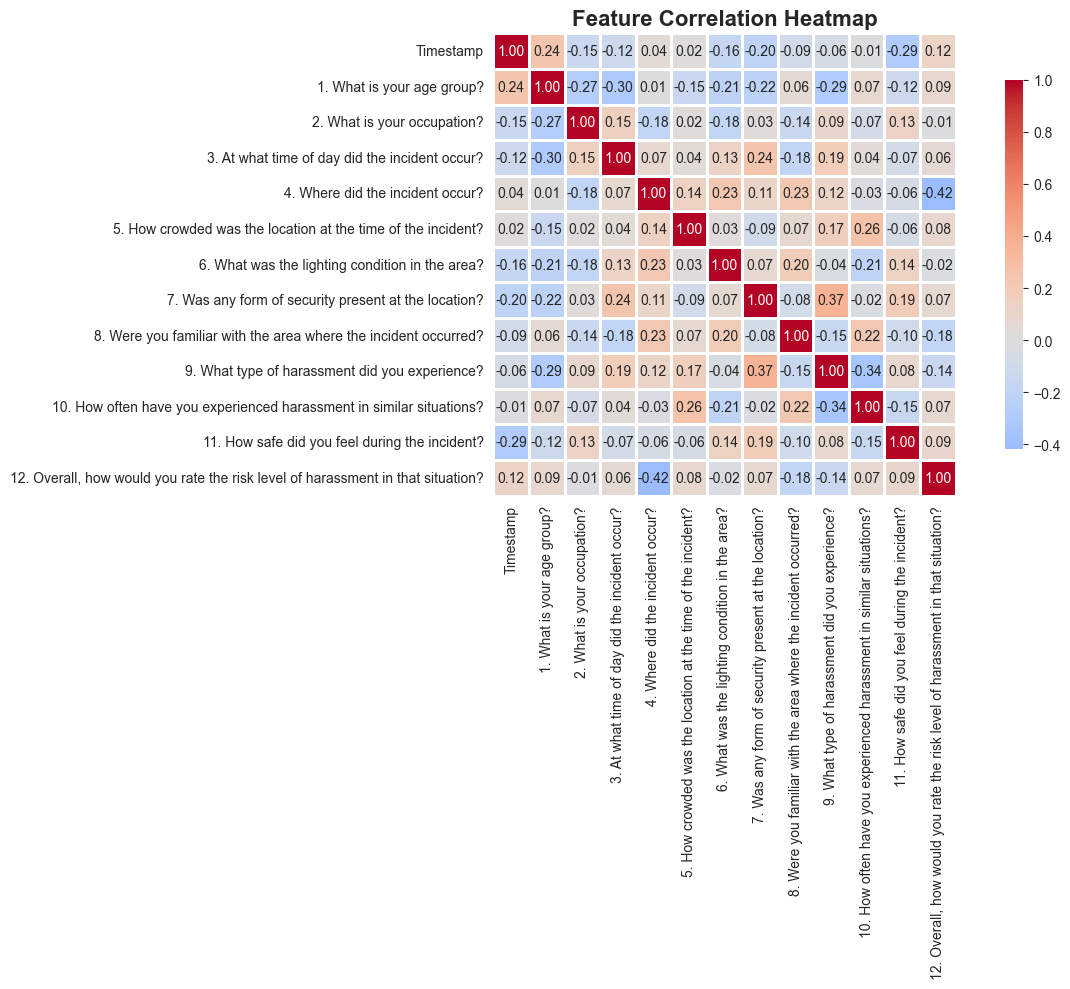


Correlation heatmap displayed


In [4]:
# Correlation analysis
print("=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation heatmap displayed")

In [5]:
# Correlation with target variable
target_col = 'risk'

if target_col in corr_matrix.columns:
    print(f"\nCorrelation with target variable ('{target_col}'):")
    target_corr = corr_matrix[target_col].sort_values(ascending=False)
    print(target_corr)
    
    # Bar plot of correlations with target
    plt.figure(figsize=(10, 6))
    target_corr_filtered = target_corr[target_corr.index != target_col]
    target_corr_filtered.plot(kind='barh', color='steelblue')
    plt.title(f'Feature Correlation with {target_col}', fontsize=14, fontweight='bold')
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(f"\nWarning: Target column '{target_col}' not found!")
    print(f"Available columns: {data.columns.tolist()}")


Available columns: ['Timestamp', '1. What is your age group?', '2. What is your occupation?', '3. At what time of day did the incident occur?', '4. Where did the incident occur?', '5. How crowded was the location at the time of the incident?', '6. What was the lighting condition in the area?', '7. Was any form of security present at the location?', '8. Were you familiar with the area where the incident occurred?', '9. What type of harassment did you experience?', '10. How often have you experienced harassment in similar situations?', '11. How safe did you feel during the incident?', '12. Overall, how would you rate the risk level of harassment in that situation?']


## 4. Create New Features

Engineer new features from existing ones to improve model performance.

In [8]:
# Create new features
print("=" * 60)
print("CREATING NEW FEATURES")
print("=" * 60)

initial_features = data.shape[1]

# Example: Create interaction features if columns exist
# Customize based on your actual dataset columns

if 'age' in data.columns and 'past_incidents' in data.columns:
    data['risk_score'] = data['age'] * data['past_incidents']
    print("\nCreated 'risk_score' = age * past_incidents")

if 'public_transport_usage' in data.columns and 'time_of_day' in data.columns:
    data['transport_time_interaction'] = data['public_transport_usage'] * data['time_of_day']
    print("Created 'transport_time_interaction' = public_transport_usage * time_of_day")

# Add more custom feature engineering based on domain knowledge

final_features = data.shape[1]
new_features = final_features - initial_features

print(f"\nNew features created: {new_features}")
print(f"Total features now: {final_features}")

if new_features > 0:
    print("\nUpdated dataset shape:", data.shape)
else:
    print("\nNo new features were created (columns may not exist)")

CREATING NEW FEATURES

New features created: 0
Total features now: 13

No new features were created (columns may not exist)


## 5. Scale Numeric Features

Standardize numerical features using StandardScaler to ensure all features are on the same scale.

In [9]:
# Scale numeric features
print("=" * 60)
print("SCALING NUMERIC FEATURES")
print("=" * 60)

target_col = 'risk'

# Identify numeric columns (excluding target)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

if target_col in numeric_cols:
    numeric_cols.remove(target_col)

if numeric_cols:
    print(f"\nNumeric columns to scale ({len(numeric_cols)}): {numeric_cols}")
    
    scaler = StandardScaler()
    data_scaled = data.copy()
    data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])
    
    # Save the scaler
    os.makedirs('../models', exist_ok=True)
    joblib.dump(scaler, '../models/scaler.pkl')
    print("\nScaler saved to '../models/scaler.pkl'")
    
    # Show statistics before and after scaling
    print("\n--- Statistics Before Scaling ---")
    print(data[numeric_cols].describe())
    
    print("\n--- Statistics After Scaling ---")
    print(data_scaled[numeric_cols].describe())
    
    # Update data with scaled values
    data = data_scaled
else:
    print("\nNo numeric columns found to scale!")

SCALING NUMERIC FEATURES

Numeric columns to scale (13): ['Timestamp', '1. What is your age group?', '2. What is your occupation?', '3. At what time of day did the incident occur?', '4. Where did the incident occur?', '5. How crowded was the location at the time of the incident?', '6. What was the lighting condition in the area?', '7. Was any form of security present at the location?', '8. Were you familiar with the area where the incident occurred?', '9. What type of harassment did you experience?', '10. How often have you experienced harassment in similar situations?', '11. How safe did you feel during the incident?', '12. Overall, how would you rate the risk level of harassment in that situation?']

Scaler saved to '../models/scaler.pkl'

--- Statistics Before Scaling ---
        Timestamp  1. What is your age group?  2. What is your occupation?  \
count  115.000000                  115.000000                   115.000000   
mean    57.000000                    1.269565             

## 6. Split Features and Target

Separate features (X) from the target variable (y) for verification.

In [10]:
# Split features and target
print("=" * 60)
print("SPLITTING FEATURES AND TARGET")
print("=" * 60)

target_col = 'risk'

if target_col in data.columns:
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    
    print(f"\nFeatures shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    
    print(f"\nTarget distribution:")
    print(y.value_counts())
    
    print(f"\nTarget distribution (%):")
    print(y.value_counts(normalize=True) * 100)
else:
    print(f"\nError: Target column '{target_col}' not found!")
    print(f"Available columns: {data.columns.tolist()}")

SPLITTING FEATURES AND TARGET

Error: Target column 'risk' not found!
Available columns: ['Timestamp', '1. What is your age group?', '2. What is your occupation?', '3. At what time of day did the incident occur?', '4. Where did the incident occur?', '5. How crowded was the location at the time of the incident?', '6. What was the lighting condition in the area?', '7. Was any form of security present at the location?', '8. Were you familiar with the area where the incident occurred?', '9. What type of harassment did you experience?', '10. How often have you experienced harassment in similar situations?', '11. How safe did you feel during the incident?', '12. Overall, how would you rate the risk level of harassment in that situation?']


## 7. Save Processed Data

Save the feature-engineered dataset for model training.

In [ ]:
# Save processed data
output_path = "../data/women_risk_processed.csv"

print("=" * 60)
print("SAVING PROCESSED DATA")
print("=" * 60)

data.to_csv(output_path, index=False)

print(f"\nProcessed data saved to: {output_path}")
print(f"Shape: {data.shape}")
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

print("\n" + "=" * 60)
print("FEATURE ENGINEERING COMPLETED SUCCESSFULLY!")
print("=" * 60)

print("\nNext Steps:")
print("   1. Review the processed data")
print("   2. Proceed to model training")
print("   3. Use the saved scaler and encoders for predictions")

SAVING PROCESSED DATA

✅ Processed data saved to: ../data/women_risk_processed.csv
✅ Shape: (115, 13)
✅ Rows: 115
✅ Columns: 13

FEATURE ENGINEERING COMPLETED SUCCESSFULLY!

📌 Next Steps:
   1. Review the processed data
   2. Proceed to model training
   3. Use the saved scaler and encoders for predictions


: 